Задача
Постройте с помощью subplots графики цены для датасета aws spot prices для ОС Windows и всех архитектур вида i*. 

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

In [6]:
# Загрузим данные

data = pd.read_csv('ap-northeast-1.csv', parse_dates= True)
data.head()


,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1a,1.6503
0,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1c,1.7461
1,2017-05-08 21:46:34+00:00,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2,2017-05-08 21:46:34+00:00,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
3,2017-05-08 21:46:17+00:00,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
4,2017-05-08 21:46:17+00:00,c4.8xlarge,Linux/UNIX,ap-northeast-1a,0.6890


In [7]:
# Переименуем заголовки

data.columns = ['Date', 'Architecture','OS','AWS Region Code','Price']
data

,Date,Architecture,OS,AWS Region Code,Price
0,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1c,1.7461
1,2017-05-08 21:46:34+00:00,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2,2017-05-08 21:46:34+00:00,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
3,2017-05-08 21:46:17+00:00,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
4,2017-05-08 21:46:17+00:00,c4.8xlarge,Linux/UNIX,ap-northeast-1a,0.6890
...,...,...,...,...,...
1956994,2017-03-30 07:25:16+00:00,g2.2xlarge,Windows,ap-northeast-1c,0.1183
1956995,2017-03-30 07:25:13+00:00,m4.xlarge,Windows,ap-northeast-1c,0.2394
1956996,2017-03-30 07:25:13+00:00,c3.2xlarge,SUSE Linux,ap-northeast-1c,0.1976
1956997,2017-03-30 07:25:13+00:00,c3.2xlarge,Linux/UNIX,ap-northeast-1c,0.0976


In [8]:
# Отфильтруем  по (ОС)! и архитектуре "i"

data = data[(data['OS'] == 'Windows') & (data['Architecture'].str.startswith('i'))] 
data

,Date,Architecture,OS,AWS Region Code,Price
35,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2120
36,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2120
90,2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210
174,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.2200
175,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.2200
...,...,...,...,...,...
1955643,2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198
1955723,2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195
1955791,2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164
1955842,2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162


In [9]:
# Проблема 1: Меняем формат дат 

data['Date'] = [pd.to_datetime(str(date)).strftime('%Y-%m-%d') for date in data['Date']]
data

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Architecture,OS,AWS Region Code,Price
35,2017-05-08,i2.xlarge,Windows,ap-northeast-1a,0.2120
36,2017-05-08,i2.xlarge,Windows,ap-northeast-1c,0.2120
90,2017-05-08,i2.xlarge,Windows,ap-northeast-1a,0.2210
174,2017-05-08,i3.xlarge,Windows,ap-northeast-1a,0.2200
175,2017-05-08,i3.xlarge,Windows,ap-northeast-1c,0.2200
...,...,...,...,...,...
1955643,2017-03-30,i2.xlarge,Windows,ap-northeast-1c,0.2198
1955723,2017-03-30,i2.xlarge,Windows,ap-northeast-1c,0.2195
1955791,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2164
1955842,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2162


In [10]:
# Проблема 2: Данные даны задом наперед, в датафрейме сначала "новые даты", а потом более "старые"
# Из-за этого, когда мы будем строить график, он нарисуется "в прошлое"
# Отсоритруем данные в правильном порядке
# data.sort_values('Date') # Отсоритруем данные по колонке 'Date' по возрастанию! (это новый объект)

data = data.sort_values('Date') # Отсоритруем данные по колонке 'Date' по возрастанию! (здесь переменную 'Date')
data

,Date,Architecture,OS,AWS Region Code,Price
1956356,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2157
1920521,2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,2.0510
1920541,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2159
1920543,2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,1.8010
1920548,2017-03-30,i2.8xlarge,Windows,ap-northeast-1a,1.7529
...,...,...,...,...,...
25487,2017-05-08,i3.large,Windows,ap-northeast-1c,0.1112
25579,2017-05-08,i3.large,Windows,ap-northeast-1c,0.1115
25588,2017-05-08,i3.large,Windows,ap-northeast-1c,0.1113
24384,2017-05-08,i2.2xlarge,Windows,ap-northeast-1a,0.4772


In [11]:
# Проблема 3: При сортировке развернулся индекс = "сбросим" его
# data.reset_index()  новые объект

data = data.reset_index(drop=True) # здесь перезаписали правильную последовательность индекса
data


,Date,Architecture,OS,AWS Region Code,Price
0,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2157
1,2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,2.0510
2,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2159
3,2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,1.8010
4,2017-03-30,i2.8xlarge,Windows,ap-northeast-1a,1.7529
...,...,...,...,...,...
22841,2017-05-08,i3.large,Windows,ap-northeast-1c,0.1112
22842,2017-05-08,i3.large,Windows,ap-northeast-1c,0.1115
22843,2017-05-08,i3.large,Windows,ap-northeast-1c,0.1113
22844,2017-05-08,i2.2xlarge,Windows,ap-northeast-1a,0.4772


In [8]:
# Найдем уникальные архитектуры в нашем отобранном датасете

data['Architecture'].unique()

array(['i2.xlarge', 'i2.8xlarge', 'i3.xlarge', 'i2.4xlarge', 'i3.large',
       'i3.2xlarge', 'i3.4xlarge', 'i2.2xlarge', 'i3.8xlarge',
       'i3.16xlarge'], dtype=object)

In [81]:
# Отбор миним и макс цены по датам по каждой архитиктуре

i2_xlarge_min = data.query('Architecture=="i2.xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i2.xlarge"
i2_xlarge_max = data.query('Architecture=="i2.xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i2.xlarge" 
i2_8xlarge_min = data.query('Architecture=="i2.8xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i2.8xlarge"
i2_8xlarge_max = data.query('Architecture=="i2.8xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i2.8xlarge"
i3_xlarge_min = data.query('Architecture=="i3.xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i3.xlarge"
i3_xlarge_max = data.query('Architecture=="i3.xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i3.xlarge" 
i3_2xlarge_min = data.query('Architecture=="i3.2xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i3.2xlarge"
i3_2xlarge_max = data.query('Architecture=="i3.2xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i3.2xlarge" 
i3_4xlarge_min = data.query('Architecture=="i3.4xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i3.4xlarge"
i3_4xlarge_max = data.query('Architecture=="i3.4xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i3.4xlarge" 
i3_large_min = data.query('Architecture=="i3.large"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i3.large"
i3_large_max = data.query('Architecture=="i3.large"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i3.large" 
i2_4xlarge_min = data.query('Architecture=="i2.4xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i2.4xlarge"
i2_4xlarge_max = data.query('Architecture=="i2.4xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i2.4xlarge" 
i3_8xlarge_min = data.query('Architecture=="i3.8xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i3.8xlarge"
i3_8xlarge_max = data.query('Architecture=="i3.8xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i3.8xlarge" 
i2_2xlarge_min = data.query('Architecture=="i2.2xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i2.2xlarge"
i2_2xlarge_max = data.query('Architecture=="i2.2xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i2.2xlarge" 
i3_16xlarge_min = data.query('Architecture=="i3.16xlarge"').groupby('Date', as_index = False).agg({'Price': 'min'}) # отобрала мин.цену по архитиктуре "i3.16xlarge"
i3_16xlarge_max = data.query('Architecture=="i3.16xlarge"').groupby('Date', as_index = False).agg({'Price': 'max'}) # отобрала мин.цену по архитиктуре "i3.16xlarge" 

In [82]:
# Объединим миним и макс цены по датам по архитиктурам

i2_xlarge=i2_xlarge_min.merge(i2_xlarge_max, on='Date', how='inner')
i2_8xlarge=i2_8xlarge_min.merge(i2_8xlarge_max, on='Date', how='inner')
i3_xlarge=i3_xlarge_min.merge(i3_xlarge_max, on='Date', how='inner')
i3_2xlarge=i3_2xlarge_min.merge(i3_2xlarge_max, on='Date', how='inner')
i3_4xlarge=i3_4xlarge_min.merge(i3_4xlarge_max, on='Date', how='inner')
i3_large=i3_large_min.merge(i3_large_max, on='Date', how='inner')
i2_4xlarge=i2_4xlarge_min.merge(i2_4xlarge_max, on='Date', how='inner') 
i3_8xlarge=i3_8xlarge_min.merge(i3_8xlarge_max, on='Date', how='inner')
i2_2xlarge=i2_2xlarge_min.merge(i2_2xlarge_max, on='Date', how='inner')
i3_16xlarge=i3_16xlarge_min.merge(i3_16xlarge_max, on='Date', how='inner')


KeyError: 'min'

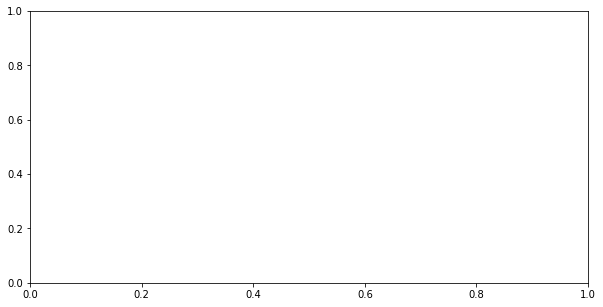

In [80]:
# напишем функцию для построения графиков

def plot_architecture(data, architecture):
    fig, subplot = plt.subplots(figsize=(10,5))

    subplot.plot(data['Date'], data['min']
                 , label='Price, min'
                 , color='g')
    subplot.plot(data['Date'], data['max']
                 , label='Price, max'
                 , color='r')
    plt.xticks(rotation='vertical')                 
    plt.title('Min and max.prices for Architecture ' + architecture + ' US$', size=15)
    subplot.set_xlabel('Dates')
    subplot.set_ylabel('Prices, US$')
    subplot.grid()
    subplot.legend(loc='upper left', title='Prices')
    
plot_architecture(i2_xlarge, 'i2.xlarge')
plot_architecture(i2_8xlarge, 'i2.8xlarge')
plot_architecture(i3_xlarge, 'i3.xlarge')
plot_architecture(i3_2xlarge, 'i3.2xlarge')
plot_architecture(i3_4xlarge, 'i3.4xlarge')
plot_architecture(i3_large, 'i3.large')    
plot_architecture(i2_4xlarge, 'i2.4xlarge')  
plot_architecture(i3_8xlarge, 'i3.8xlarge') 
plot_architecture(i2_2xlarge, 'i2.2xlarge') 
plot_architecture(i3_16xlarge, 'i3.16xlarge') 